In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

Importamos los datos de letras de canciones y los juntamos en un solo dataset. Vemos la forma de DF

In [9]:
folder_path = r"C:\Users\solan\Downloads\clasificador-letras\data\datos"  #crear ruta de la carpeta con los archivos
output_path =  r"C:\Users\solan\Downloads\clasificador-letras\data" #crear ruta de salida
dataframes = []  #crear lista vacía para guardar los DF

#iterar por cada archivo de la carpeta
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  #verificar si el archivo es un csv
        file_path = os.path.join(folder_path, file)  #crear ruta del archivo
        #Leer cada archivo y añadirlo a la lista de dataframes
        df = pd.read_csv(file_path, on_bad_lines='skip', engine='python')
        dataframes.append(df)

#Combinar todos los dataframes en uno solo
combined_df = pd.concat(dataframes, ignore_index=True)

# Eliminar columnas de URLs
df = combined_df.drop(columns=['ARTIST_URL', 'SONG_URL'], errors='ignore')

# Verificar el resultado
print(combined_df.info())
print(combined_df.head())


#Guardar el DF combinado como CSV
output_file = os.path.join(output_path, "combined_dataset.csv")
combined_df.to_csv(output_file, index=False)

#Mostrar info básica
print(combined_df.info())
print(combined_df.head())
print(f"Dataset combinado guardado en {output_file}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131193 entries, 0 to 131192
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ARTIST_NAME  131193 non-null  object
 1   ARTIST_URL   131193 non-null  object
 2   SONG_NAME    131193 non-null  object
 3   SONG_URL     131193 non-null  object
 4   LYRICS       131193 non-null  object
dtypes: object(5)
memory usage: 5.0+ MB
None
  ARTIST_NAME                                 ARTIST_URL           SONG_NAME  \
0   03 greedo  https://www.azlyrics.com/19/03greedo.html          sweet lady   
1   03 greedo  https://www.azlyrics.com/19/03greedo.html      mafia business   
2   03 greedo  https://www.azlyrics.com/19/03greedo.html            paranoid   
3   03 greedo  https://www.azlyrics.com/19/03greedo.html          never bend   
4   03 greedo  https://www.azlyrics.com/19/03greedo.html  prayer for my lost   

                                            SONG_URL  \
0  https://www

In [10]:
# Número de duplicados en el dataset completo
total_duplicados = df.duplicated().sum()
print(f"Número total de duplicados en el dataset: {total_duplicados}")


Número total de duplicados en el dataset: 225


In [11]:
#Número de duplicados basados en artista y canción
duplicados_artist_song = df.duplicated(subset=['ARTIST_NAME', 'SONG_NAME']).sum()
print(f"Número de duplicados basados en ARTIST_NAME y SONG_NAME: {duplicados_artist_song}")


Número de duplicados basados en ARTIST_NAME y SONG_NAME: 395


In [12]:
# Eliminar duplicados en el dataset completo
df = df.drop_duplicates()

print(f"Dataset después de eliminar duplicados: {len(df)} filas")


Dataset después de eliminar duplicados: 130968 filas


In [13]:
# Eliminar duplicados basados en ARTIST_NAME y SONG_NAME
df = df.drop_duplicates(subset=['ARTIST_NAME', 'SONG_NAME'])

print(f"Dataset después de eliminar duplicados basados en ARTIST_NAME y SONG_NAME: {len(df)} filas")


Dataset después de eliminar duplicados basados en ARTIST_NAME y SONG_NAME: 130798 filas


In [14]:
df.head()

,ARTIST_NAME,SONG_NAME,LYRICS
0,03 greedo,sweet lady,"its only one, 03, i'm from grape street, where..."
1,03 greedo,mafia business,"you gonna make me put you in a suit and tie, s..."
2,03 greedo,paranoid,"we could kill it, yeah, we could, we could, we..."
3,03 greedo,never bend,"yeah, you lil bitch ass niggas steady speaking..."
4,03 greedo,prayer for my lost,"x loaded up bro, never see me in the church, p..."


In [15]:
# Verificar si hay valores nulos en cada columna
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)


ARTIST_NAME    0
SONG_NAME      0
LYRICS         0
dtype: int64


In [16]:
# Sobrescribir el archivo original o guardar uno nuevo
file_path = r"C:\Users\solan\Downloads\clasificador-letras\data\combined_dataset.csv"
df.to_csv(file_path, index=False)
print(f"Dataset limpio guardado en: {file_path}")


Dataset limpio guardado en: C:\Users\solan\Downloads\clasificador-letras\data\combined_dataset.csv


In [17]:
print(df.columns)
print(df.head())


Index(['ARTIST_NAME', 'SONG_NAME', 'LYRICS'], dtype='object')
  ARTIST_NAME           SONG_NAME  \
0   03 greedo          sweet lady   
1   03 greedo      mafia business   
2   03 greedo            paranoid   
3   03 greedo          never bend   
4   03 greedo  prayer for my lost   

                                              LYRICS  
0  its only one, 03, i'm from grape street, where...  
1  you gonna make me put you in a suit and tie, s...  
2  we could kill it, yeah, we could, we could, we...  
3  yeah, you lil bitch ass niggas steady speaking...  
4  x loaded up bro, never see me in the church, p...  


In [18]:
print(df.columns)


Index(['ARTIST_NAME', 'SONG_NAME', 'LYRICS'], dtype='object')


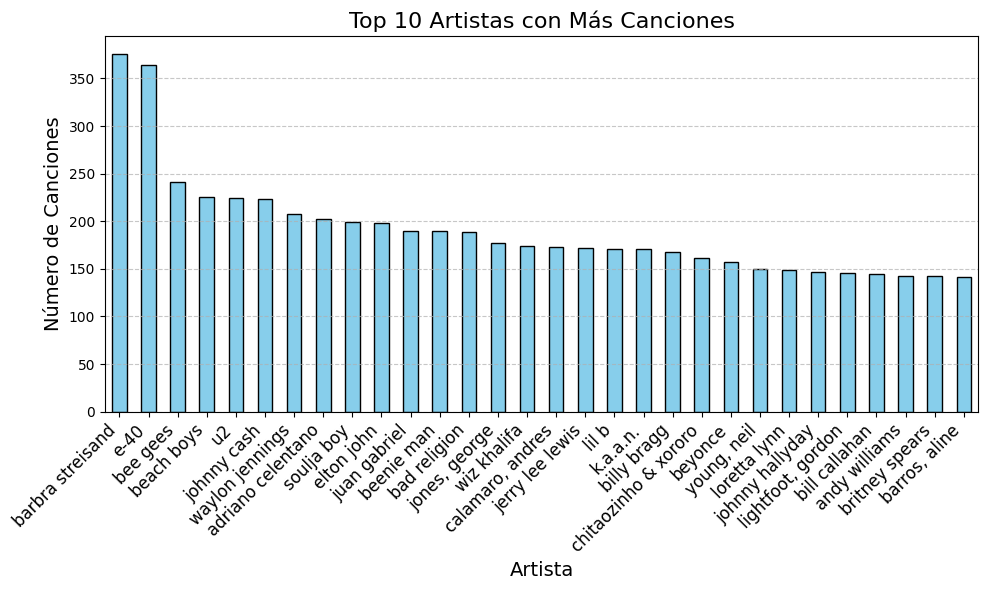

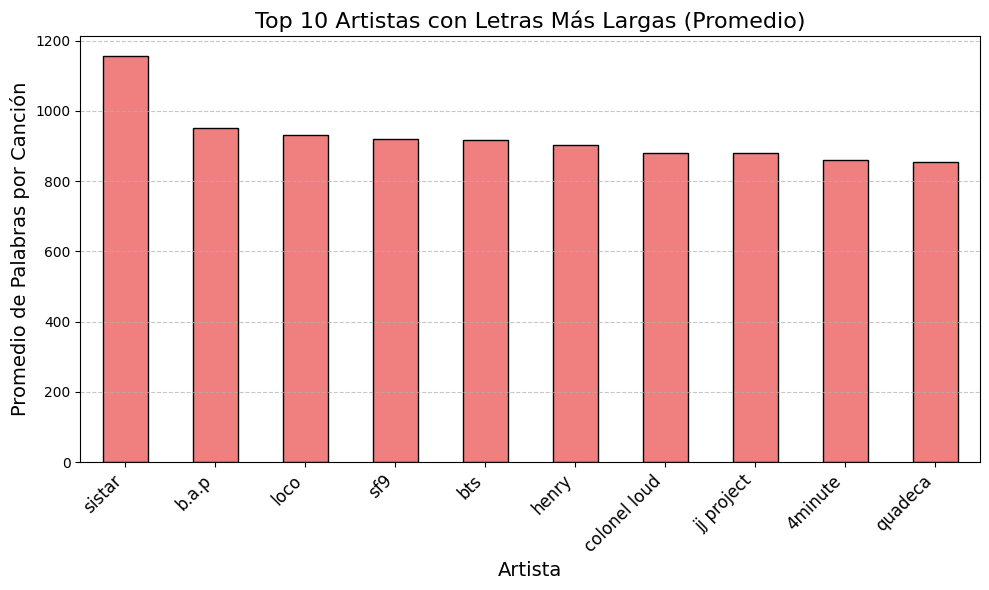

In [19]:
# Paso 1.1: Contar el número de canciones por artista
artist_song_count = df['ARTIST_NAME'].value_counts().head(30)

# Gráfico 1: Top 10 artistas con más canciones
plt.figure(figsize=(10, 6))
artist_song_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Artistas con Más Canciones', fontsize=16)
plt.xlabel('Artista', fontsize=14)
plt.ylabel('Número de Canciones', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Paso 1.2: Calcular la longitud promedio de las letras (en palabras)
df['LYRICS_LENGTH'] = df['LYRICS'].apply(lambda x: len(x.split()))
lyrics_length_mean = df.groupby('ARTIST_NAME')['LYRICS_LENGTH'].mean().sort_values(ascending=False).head(10)

# Gráfico 2: Top 10 artistas con letras más largas (promedio de palabras)
plt.figure(figsize=(10, 6))
lyrics_length_mean.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Artistas con Letras Más Largas (Promedio)', fontsize=16)
plt.xlabel('Artista', fontsize=14)
plt.ylabel('Promedio de Palabras por Canción', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
# Ordenar las canciones por la cantidad de palabras en las letras
df['LYRICS_LENGTH'] = df['LYRICS'].str.split().apply(len)  # Contar palabras en las letras
longest_lyrics = df.sort_values(by='LYRICS_LENGTH', ascending=False).head(10)  # Seleccionar las 10 más largas

# Mostrar información de las canciones con letras más largas
print(longest_lyrics[['ARTIST_NAME', 'SONG_NAME', 'LYRICS_LENGTH', 'LYRICS']])


            ARTIST_NAME                                     SONG_NAME  \
103176          quadeca                         30,000 word rap song!   
75537         kc rebell                   mehr tranen (allstar remix)   
20411               bts                      bts cypher pt. 3: killer   
104452            rohff                              du fond du coeur   
21053   bennett, taylor               10 fingers of death (freestyle)   
111249   slaughterhouse                                      offshore   
64529          jay park                             weonhae (want it)   
20409               bts               hip hop lover (hibhabseongaeja)   
51863               exo  girl x friend (Nu  x You ) (chinese version)   
20420               bts                                   outro: tear   

        LYRICS_LENGTH                                             LYRICS  
103176          19974  yeah, ayy, ayy, 30,000 words in a rap that's a...  
75537            2252  es sind mehr tranen, fu

In [21]:
# Añadir columna con longitud de las letras (número de palabras)
df['LYRICS_LENGTH'] = df['LYRICS'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Resumen estadístico general
lyrics_stats = df['LYRICS_LENGTH'].describe()
print(lyrics_stats)

# Canciones más largas y más cortas
print("Canción más larga:")
print(df.loc[df['LYRICS_LENGTH'].idxmax()])
print("\nCanción más corta:")
print(df.loc[df['LYRICS_LENGTH'].idxmin()])


count    130798.000000
mean        256.227427
std         158.769061
min           1.000000
25%         157.000000
50%         223.000000
75%         314.000000
max       19974.000000
Name: LYRICS_LENGTH, dtype: float64
Canción más larga:
ARTIST_NAME                                                quadeca
SONG_NAME                                    30,000 word rap song!
LYRICS           yeah, ayy, ayy, 30,000 words in a rap that's a...
LYRICS_LENGTH                                                19974
Name: 103176, dtype: object

Canción más corta:
ARTIST_NAME                        agust d
SONG_NAME        interlude: dream, reality
LYRICS                              dream.
LYRICS_LENGTH                            1
Name: 5531, dtype: object


In [22]:
# Violin plot de la longitud de las letras
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='LYRICS_LENGTH', color="lightgreen")
plt.title("Distribución de la Longitud de las Letras (Violin Plot)", fontsize=16)
plt.xlabel("Número de Palabras", fontsize=12)
plt.show()



NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

para después

In [22]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter

# Descargar recursos de nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Para compatibilidad con WordNet en otros idiomas
nltk.download('stopwords')  # Descargar stopwords
nltk.download('punkt')  # Tokenizer necesario para dividir las palabras

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Obtener stopwords en inglés
stop_words = set(stopwords.words('english'))

# Unir todas las letras en un solo texto
all_lyrics = " ".join(df['LYRICS'].dropna())

# Dividir en palabras (tokenizar)
words = nltk.word_tokenize(all_lyrics)

# Lematizar y eliminar stopwords
lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]

# Contar las palabras lematizadas
word_counts = Counter(lemmatized_words)

# Obtener las 50 palabras más comunes
most_common_words = word_counts.most_common(50)

# Mostrar resultados
print("Palabras más comunes después de lematizar:")
for word, count in most_common_words:
    print(f"{word}: {count}")


ModuleNotFoundError: No module named 'nltk'

PRUEBAS DATOS

In [5]:
# Ruta del archivo
file_path = r"C:\Users\solan\Downloads\clasificador-letras\data\combined_with_language.csv"

# Leer el archivo CSV
df_language = pd.read_csv(file_path)

# Mostrar información básica del dataframe
print(df_language.info())
print(df_language.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130798 entries, 0 to 130797
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ARTIST_NAME         130798 non-null  object 
 1   SONG_NAME           130798 non-null  object 
 2   LYRICS              130798 non-null  object 
 3   SPOTIFY_URL         130769 non-null  object 
 4   ALBUM_NAME          130765 non-null  object 
 5   ALBUM_RELEASE_DATE  130769 non-null  object 
 6   DURATION_MS         130769 non-null  float64
 7   POPULARITY          130769 non-null  float64
 8   PREVIEW_URL         0 non-null       float64
 9   LANGUAGE            130792 non-null  object 
dtypes: float64(3), object(7)
memory usage: 10.0+ MB
None
  ARTIST_NAME           SONG_NAME  \
0   03 greedo          sweet lady   
1   03 greedo      mafia business   
2   03 greedo            paranoid   
3   03 greedo          never bend   
4   03 greedo  prayer for my lost   

        

In [6]:
df_language = df_language.drop(columns=['PREVIEW_URL'])

# Verificar el resultado
print(df_language.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130798 entries, 0 to 130797
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ARTIST_NAME         130798 non-null  object 
 1   SONG_NAME           130798 non-null  object 
 2   LYRICS              130798 non-null  object 
 3   SPOTIFY_URL         130769 non-null  object 
 4   ALBUM_NAME          130765 non-null  object 
 5   ALBUM_RELEASE_DATE  130769 non-null  object 
 6   DURATION_MS         130769 non-null  float64
 7   POPULARITY          130769 non-null  float64
 8   LANGUAGE            130792 non-null  object 
dtypes: float64(2), object(7)
memory usage: 9.0+ MB
None


In [7]:
# Filtrar las canciones de Sabina
sabina_songs = df_language[df_language['ARTIST_NAME'].str.contains('Sabina', case=False, na=False)]

# Imprimir el dataframe filtrado
print(sabina_songs)

            ARTIST_NAME                                      SONG_NAME  \
64651    joaquin sabina                                     inventario   
64652    joaquin sabina                          tango del quinielista   
64653    joaquin sabina                                           1968   
64654    joaquin sabina                              40 orsett terrace   
64655    joaquin sabina  romance de la gentil dama y el rustico pastor   
...                 ...                                            ...   
109939  sabina, joaquin                            adivina, adivinanza   
109940  sabina, joaquin                                 cuervo ingenuo   
109941  sabina, joaquin                                       culpable   
109942  sabina, joaquin                                      despedida   
109943  sabina, joaquin                                 hay mujeres...   

                                                   LYRICS  \
64651   las cosas que me dices cuando callas, los 

In [23]:
df_language.head(5)

,ARTIST_NAME,SONG_NAME,LYRICS,SPOTIFY_URL,ALBUM_NAME,ALBUM_RELEASE_DATE,DURATION_MS,POPULARITY,LANGUAGE
0,03 greedo,sweet lady,"its only one, 03, i'm from grape street, where...",https://open.spotify.com/track/6VBuV3fk37EGAqF...,Purple Summer,2016-07-27,280790.0,57.0,en
1,03 greedo,mafia business,"you gonna make me put you in a suit and tie, s...",https://open.spotify.com/track/4T734WZlik1FM4U...,Purple Summer,2016-07-27,182000.0,39.0,en
2,03 greedo,paranoid,"we could kill it, yeah, we could, we could, we...",https://open.spotify.com/track/0z2EfOryUeqAC17...,The Wolf of Grape Street,2018-03-09,271500.0,14.0,en
3,03 greedo,never bend,"yeah, you lil bitch ass niggas steady speaking...",https://open.spotify.com/track/69W7Fe6qmAiWHYK...,The Wolf of Grape Street,2018-03-09,193101.0,45.0,en
4,03 greedo,prayer for my lost,"x loaded up bro, never see me in the church, p...",https://open.spotify.com/track/4tw5DW7nezptbfe...,God Level,2018-06-27,264829.0,11.0,en
